<a href="https://colab.research.google.com/github/stalin246/Python/blob/main/Analisisis_De_Sentimientos_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias que necesitamos

In [164]:
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Utilizamos los tokens de la api de twitter

In [165]:
consumer_key = 'tu token'
consumer_secret = 'tu token'
acces_token = 'tu token'
acces_t_secret = 'tu token'

Validamos la autenticacion con twitter por medio de nuestro token

In [197]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
#seteamos los tokens
authenticate.set_access_token(acces_token, acces_t_secret)
#pasamos la informacion
api = tweepy.API(authenticate, wait_on_rate_limit= True)

Definimos el idioma e informacion reciente de 100 twets

In [203]:
hashtag = api.user_timeline(screen_name='Cuenca', lang='en', tweet_mode='extended', count=100)
#hashtag = api.search(q='#Guayaquil', lang='en', result_type='recent', count=100)

Utilizamos un for hasta el final de los hashtag y los mostramos de los 50

In [204]:
print('show 50 tweets')
i=1
for tweet in hashtag[:50]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i += 1

show 50 tweets
1) @ssantosv @librerialuces @Ed_delaTorre Lo siento, me era imposible a esa hora 😔 ya te diré qué me parece!

2) RT @slidesgo: Nuestras compañeras Carmen Callejón, responsable de Producción, y Rocío Bonachera, responsable de marketing, han visitado hoy…

3) @librerialuces @Ed_delaTorre @ssantosv Arg, ni niño tiene partido a esa hora, no creo que llegue a tiempo pero lo intentaré!

4) @antor @bquintero Se nota la jet set, además de ordenadores teníais cámaras! 😂😘 estáis muy guapos. Yo conservo mi Amstrad CPC664, pero no esperéis pruebas gráficas de aquella época

5) @Jesusvivas11 Quieres hacer la quedada en la oficina?

6) @Jesusvivas11 :)

7) RT @FreepikCompany: Today is the perfect day to start creating amazing designs 🚀

With Wepik, our free online editor, you can design whatev…

8) @eduardomanchon @david_bonilla Cuenca... suena noble, no? :)

9) @eduardomanchon @david_bonilla “Normal” no es, a mí me juegan una de esas en mi consejo y me dan ganas de coger la escopeta.

Creamos un dataframe con pandas bajo la columna Tweets y un id

In [205]:
df = pd.DataFrame([tweet.full_text for tweet in hashtag], columns=['Tweets'])
df.head(10)

,Tweets
0,@ssantosv @librerialuces @Ed_delaTorre Lo sien...
1,RT @slidesgo: Nuestras compañeras Carmen Calle...
2,"@librerialuces @Ed_delaTorre @ssantosv Arg, ni..."
3,"@antor @bquintero Se nota la jet set, además d..."
4,@Jesusvivas11 Quieres hacer la quedada en la o...
5,@Jesusvivas11 :)
6,RT @FreepikCompany: Today is the perfect day t...
7,@eduardomanchon @david_bonilla Cuenca... suena...
8,"@eduardomanchon @david_bonilla “Normal” no es,..."
9,RT @mcaballero: Pedazo de #bonilista la de hoy...


Limpiamos nuestro dataframe de ciertos caracteres que no necesitaremos

In [206]:
#utilizamos una funcion para limpiar cada registro
def clean_text(text):
  text = re.sub(r'@[A-Za-z09]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'_', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/?', '', text)
#retornamos nuestra variable
  return text
#utilizamos nuestra funcion en nuestro dataframe "df"
df['Tweets'] = df['Tweets'].apply(clean_text)
df.head(10)

,Tweets
0,"delaTorre Lo siento, me era imposible a esa ..."
1,"Nuestras compañeras Carmen Callejón, responsab..."
2,"delaTorre Arg, ni niño tiene partido a esa h..."
3,"Se nota la jet set, además de ordenadores te..."
4,11 Quieres hacer la quedada en la oficina?
5,11 )
6,Today is the perfect day to start creating ama...
7,"bonilla Cuenca... suena noble, no? )"
8,"bonilla “Normal” no es, a mí me juegan una de..."
9,"Pedazo de bonilista la de hoy, digna de artícu..."


Realizamos el analisis deacuerdo al analisis de sentimiento recordando lo siguiente:

**Polaridad** hace referencia a cómo positivo o negativo el tono de las tasas de texto de entrada de -1 a + 1, por -1 son más negativo y + 1 está más positiva. 

**Subjetividad** hace referencia a cómo subjetiva las tasas de instrucción de 0 a 1, siendo 1 el alta subjetiva.

In [207]:
#utilizamos una funcion mediante ya el metodo de sentimiento->subjetividad
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
 # return TextBlob(text).translate(from_lang='es',to='en').sentiment.subjectivity
  return TextBlob(text).sentiment.subjectivity

#utilizamos una funcion mediante ya el metodo de sentimiento->polaridad
def get_polarity(text):
   return TextBlob(text).sentiment.polarity
  #return TextBlob(text).translate(from_lang='es',to='en').sentiment.polarity

Definimos las columnas que tendra el dataframe segun la subjetividad y polaridad

In [208]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)
df.head()

,Tweets,Subjectivity,Polarity
0,"delaTorre Lo siento, me era imposible a esa ...",0.0,0.0
1,"Nuestras compañeras Carmen Callejón, responsab...",0.0,0.0
2,"delaTorre Arg, ni niño tiene partido a esa h...",0.0,0.0
3,"Se nota la jet set, además de ordenadores te...",0.0,0.0
4,11 Quieres hacer la quedada en la oficina?,0.0,0.0


Utilizamos una grafica para representar las palabras mas usadas

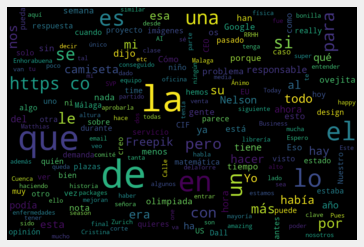

In [209]:
all_words = ' '.join( [twts for twts in df['Tweets']])
#Establecemos el modelo que tendra la grafica
word_Cloud = WordCloud(width=1080, height=720, random_state=21, max_font_size=119).generate(all_words)
#Definimos el tipo de interpolacion
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Establecemos la subjetividad y polaridad, tambien establecemos el analisis deacuerdo a las condiciones que mencionamos antes, todas ellas ubicadas ya en columnas en nuestro dataframe

In [210]:
def analysis(score):
  if score < 0:
    return 'Negative'
  # elif score == 0:
  #   return 'Neutral'
  # else:
  #   return 'Positive'
  elif score > 0:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(analysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"delaTorre Lo siento, me era imposible a esa ...",0.00,0.0,None
1,"Nuestras compañeras Carmen Callejón, responsab...",0.00,0.0,None
2,"delaTorre Arg, ni niño tiene partido a esa h...",0.00,0.0,None
3,"Se nota la jet set, además de ordenadores te...",0.00,0.0,None
4,11 Quieres hacer la quedada en la oficina?,0.00,0.0,None
...,...,...,...,...
95,"For icons, check out . Great list!",0.75,1.0,Positive
96,Sencillamente no creo que la admon tenga las h...,0.00,0.0,None
97,"Si al final la respuesta fuese negativa, pagam...",1.00,0.0,None
98,La UE da un servicio que permite a cualquiera ...,0.00,0.0,None


Mostramos los tweets positivos siendo el 1ro el mas +

In [211]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) Today is the perfect day to start creating amazing designs 🚀With Wepik, our free online editor, you can design whatev…

2)  bonilla Cuenca... suena noble, no? )

3)  bonilla “Normal” no es, a mí me juegan una de esas en mi consejo y me dan ganas de coger la escopeta.

4) We are very happy to share with you our brand new Business-to-Business (B2B) landing! 🚀If you need to integrate API @…

5) Tremendo, hablan de Dall-E pero ponen imágenes de “Dall-e mini”, que no tiene NADA que ver (ahora se llama craiyon). Acusan en el titular de hacer dibujos sexistas y racistas a un software mirando lo que dibuja otro. ⁦tec⁩ https//t.co/ymBd2YCQAf

6)  Love it! Part of the season felt a bit disconnected from previous seasons, but they IMO they tied it pretty well at the end

7) Malaga is hosting show, the world's major event on DigitalTransformation, and FreepikCompany could not miss it…

8) 🫵 Here are some of the most trending fonts you can find on Freepik’s website for your designs. 🔝 🚀 https//t

Mostramos los tweets positivos siendo el 1ro el mas -

In [212]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1)    These results are surreal. I naively thought the bottleneck was the network. Is really the time spent fetching packages such a little % of total install time in npm/yarn, or is bum doing tricks here to fetch packages faster?

2) [SPOILER OBI-WAN]El encuentro entre Darth Vader y Obi Wan ¿no os parece que le quita el sentido a lo que le dice DV a OW en el Ep4? Rollo “la última vez que nos vimos tú eras el maestro y yo el alumno…”

3) es   De qué nos estabamos riendo? Only wrong answers…

4) GDPR is a rare example to a terrible solution to a problem nobody really had or cared about, that ended up making everythi…

5) Wtf?! https//t.co/fHOlhtoOIF

6) Brutal la Zona Indie de  en la es de Malaga ❤️ https//t.co/SnGCV8kmjD

7) in   That’s not enough. If the server is owned by an american entity the US government can still force the company to hand over the data of the server. The recent rulings in EU are crazy



Utilizamos una grafica de analisis de la subjetividad y polaridad

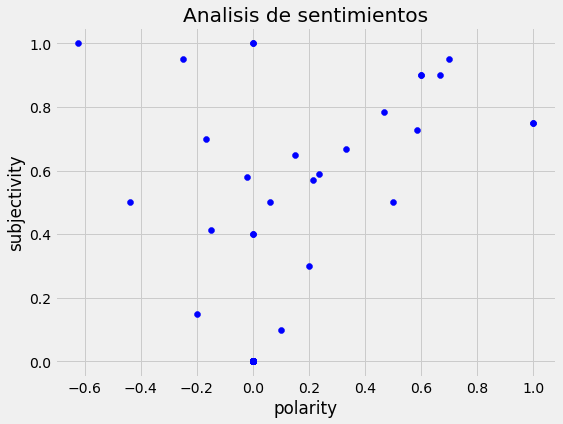

In [213]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

plt.title('Analisis de sentimientos')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

Sacamos un porcentaje de los positivos y negativos

In [214]:
ptweet = df[df.Analysis == 'Positive']
pteet = ptweet['Tweets']

round(ptweet.shape[0] / df.shape[0] * 100, 1)

16.0

In [215]:
ntweet = df[df.Analysis == 'Negative']
nteet = ntweet['Tweets']

round(ntweet.shape[0] / df.shape[0] * 100, 1)

7.0

Finalmente graficamos las columnas positivas y negativas

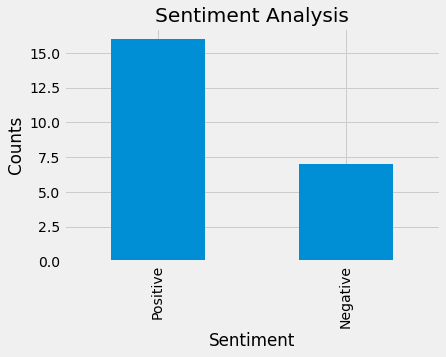

In [216]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()